In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

In [2]:
# to ignore the unwanted future warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"C:\Users\Gaurav\Downloads\titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df=df.dropna()

In [7]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


<Axes: >

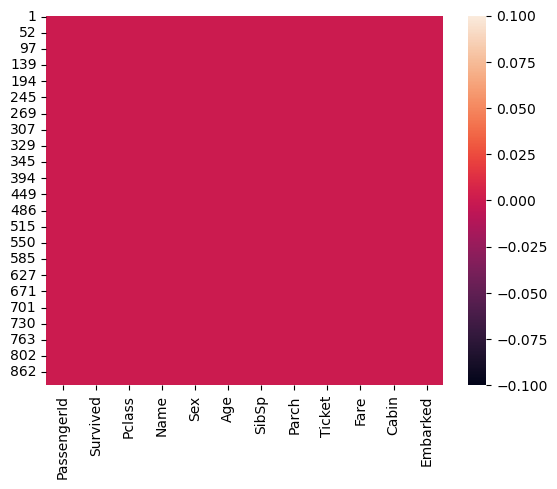

In [9]:
sns.heatmap(df.isnull())

In [10]:
ports = pd.get_dummies(df.Embarked, prefix='Embarked', dtype=int)
ports.head()

,Embarked_C,Embarked_Q,Embarked_S
1,1,0,0
3,0,0,1
6,0,0,1
10,0,0,1
11,0,0,1


In [11]:
df = df.join(ports)

In [12]:
df.drop(['Embarked'],axis=1, inplace=True)

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,0,0,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,0,0,1
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,0,0,1


In [14]:
df.Sex=df.Sex.map({'male':0,'female':1})

In [15]:
df['Sex']

1      1
3      1
6      0
10     1
11     1
      ..
871    1
872    0
879    1
887    1
889    0
Name: Sex, Length: 183, dtype: int64

In [16]:
#splitting the data 
Y = df.Survived.copy()
X = df.drop(['Survived'],axis = 1)

In [17]:
# we are dropping the attributed which does not have a strong coorelation to affect the outcome
X.drop(['Cabin','Ticket','Name','PassengerId'], axis = 1, inplace=True)

In [24]:
X.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [26]:
X.Age.fillna(X.Age.mean(),inplace=True)

In [30]:
X.isnull().values.any()

False

In [36]:
from sklearn.model_selection import train_test_split 

X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.2, random_state=7)

In [42]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [44]:
model.fit(X_train,Y_train)

LogisticRegression()

In [46]:
model.score(X_train,Y_train)

0.7945205479452054

In [48]:
Y_pred_test=model.predict(X_test)
Y_pred_test

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

In [50]:
Y_test

139    0
558    1
449    1
136    1
779    1
587    1
690    1
871    1
585    1
505    0
887    1
556    1
394    1
712    1
681    1
632    1
782    0
802    1
438    0
429    1
544    0
577    1
539    1
618    1
621    1
262    0
609    1
492    0
366    1
741    0
88     1
194    1
318    1
487    0
806    0
215    1
456    0
Name: Survived, dtype: int64

In [52]:
#import metrics to check accuracy
from sklearn.metrics import accuracy_score
print('model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, Y_pred_test)))

model accuracy score: 0.7297
